In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# 데이터 불러오기

data = pd.read_csv('bike.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [153]:
# 데이터 이해 및 탐색

print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [154]:
# 결측치 처리

print(data.isnull().sum()) # 결측치 없음



datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [155]:
# 중복 확인 
print(data[data.duplicated()]) #중복값 없음

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


temp 열의 이상치 개수: 0
atemp 열의 이상치 개수: 0
humidity 열의 이상치 개수: 22
windspeed 열의 이상치 개수: 227
casual 열의 이상치 개수: 749
registered 열의 이상치 개수: 423
count 열의 이상치 개수: 300


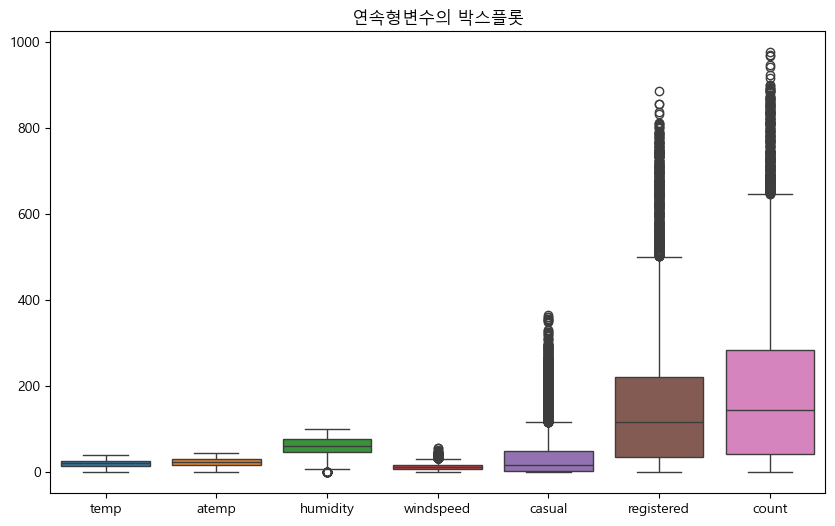

In [156]:
# 이상치 탐지 및 처리

# 연속형 변수 리스트
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# IQR 계산 함수
def get_iqr_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# 각 열에 대해 IQR 계산
outliers = {}
for col in continuous_cols:
    lower_bound, upper_bound = get_iqr_bounds(data, col)
    outliers[col] = {'lower': lower_bound, 'upper': upper_bound}
outliers
# 이상치 탐지
for col in continuous_cols:
    lower_bound, upper_bound = outliers[col]['lower'], outliers[col]['upper']
    # 해당 범위를 벗어난 값들을 이상치로 표시
    outliers_in_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col} 열의 이상치 개수: {len(outliers_in_col)}")
    # print(outliers_in_col.head())

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[continuous_cols])
plt.title("연속형변수의 박스플롯")
plt.show()

In [157]:
# 원본 정규화
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 원본 데이터를 그대로 두고, 정규화된 데이터를 다른 변수에 저장
data_nor = data.copy()

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

scaler_cols = ['temp', 'humidity', 'windspeed']

# 원본 데이터에서 연속형 변수 정규화
data_nor[scaler_cols] = scaler.fit_transform(data_nor[scaler_cols])


# 정규화된 데이터의 범위 확인
print(data_nor[scaler_cols].min())
print(data_nor[scaler_cols].max())
# 정규화 후 데이터 확인
print(data_nor[scaler_cols].head())






temp         0.0
humidity     0.0
windspeed    0.0
dtype: float64
temp         1.0
humidity     1.0
windspeed    1.0
dtype: float64
       temp  humidity  windspeed
0  0.224490      0.81        0.0
1  0.204082      0.80        0.0
2  0.204082      0.80        0.0
3  0.224490      0.75        0.0
4  0.224490      0.75        0.0


temp
humidity
windspeed


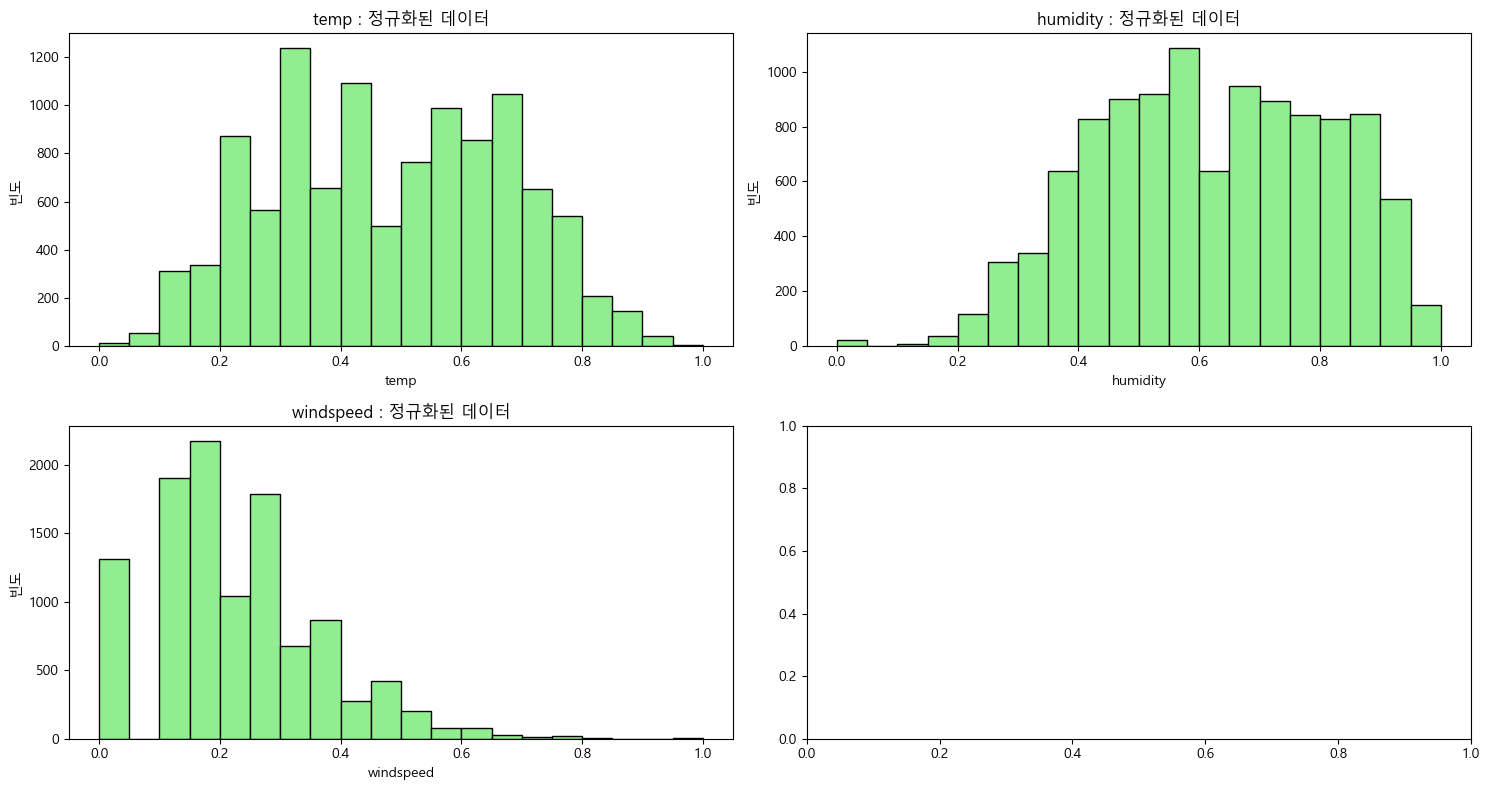

In [158]:
# 정규화한 2x4 서브플롯 생성 (2행 4열, 7개의 변수에 맞게 조정)
fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # 2x4 서브플롯, 크기 (15, 8)

# 각 연속형 변수에 대해 서브플롯을 그리기
for i, col in enumerate(scaler_cols):
    print(col)
    ax = axs[i // 2, i % 2]  # 서브플롯의 위치 지정
    ax.hist(data_nor[col], bins=20, color='lightgreen', edgecolor='black')  # 히스토그램
    ax.set_title(f'{col} : 정규화된 데이터')  # 타이틀 설정
    ax.set_xlabel(col)  # x축 레이블 설정
    ax.set_ylabel('빈도')  # y축 레이블 설정

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

In [159]:
data_nor

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,0.224490,14.395,0.81,0.000000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,0.204082,13.635,0.80,0.000000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,0.204082,13.635,0.80,0.000000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,0.224490,14.395,0.75,0.000000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,0.224490,14.395,0.75,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,0.367347,19.695,0.50,0.456213,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,0.346939,17.425,0.57,0.263195,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,0.326531,15.910,0.61,0.263195,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,0.326531,17.425,0.61,0.105325,12,117,129


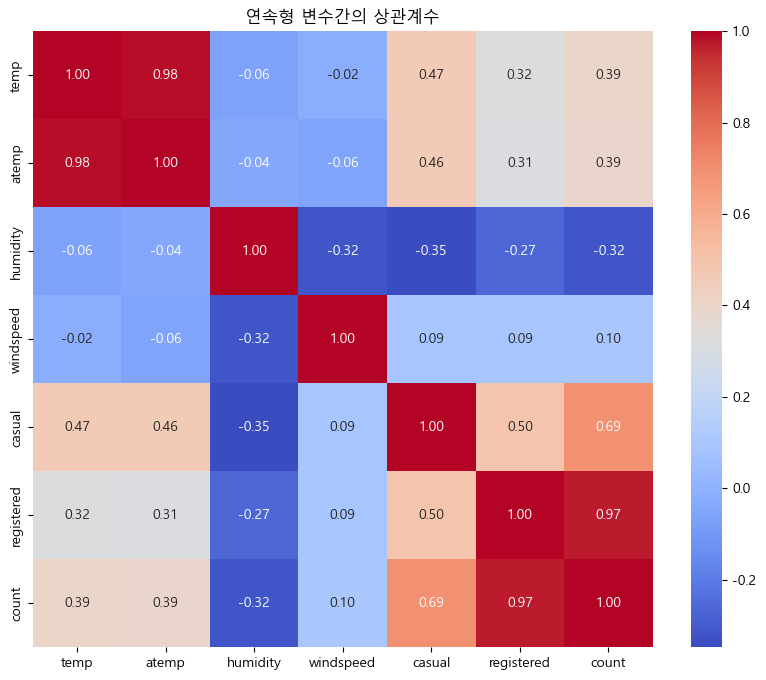

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# 연속형 변수 간 상관계수 계산 (피어슨 상관계수)
corr_matrix = data_nor[continuous_cols].corr()  # 연속형 변수 + 타겟 변수
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("연속형 변수간의 상관계수")
plt.show()

In [161]:
# count와 각 연속형 변수들 간의 피어슨 상관계수와 p-value 계산
correlations = {}
for col in continuous_cols:
    corr, p_val = pearsonr(data_nor[col], data_nor['count'])
    correlations[col] = {'correlation': corr, 'p_value': p_val}

# 결과 출력
correlation_df = pd.DataFrame(correlations).T
print(correlation_df)

# 상관계수 출력
print("연속형 변수들과 'count' 간의 상관계수:")


            correlation        p_value
temp           0.394454   0.000000e+00
atemp          0.389784   0.000000e+00
humidity      -0.317371  2.921542e-253
windspeed      0.101369   2.898407e-26
casual         0.690414   0.000000e+00
registered     0.970948   0.000000e+00
count          1.000000   0.000000e+00
연속형 변수들과 'count' 간의 상관계수:


            correlation        p_value
temp           0.394454   0.000000e+00
atemp          0.389784   0.000000e+00
humidity      -0.317371  2.921542e-253
windspeed      0.101369   2.898407e-26
casual         0.690414   0.000000e+00
registered     0.970948   0.000000e+00
count          1.000000   0.000000e+00


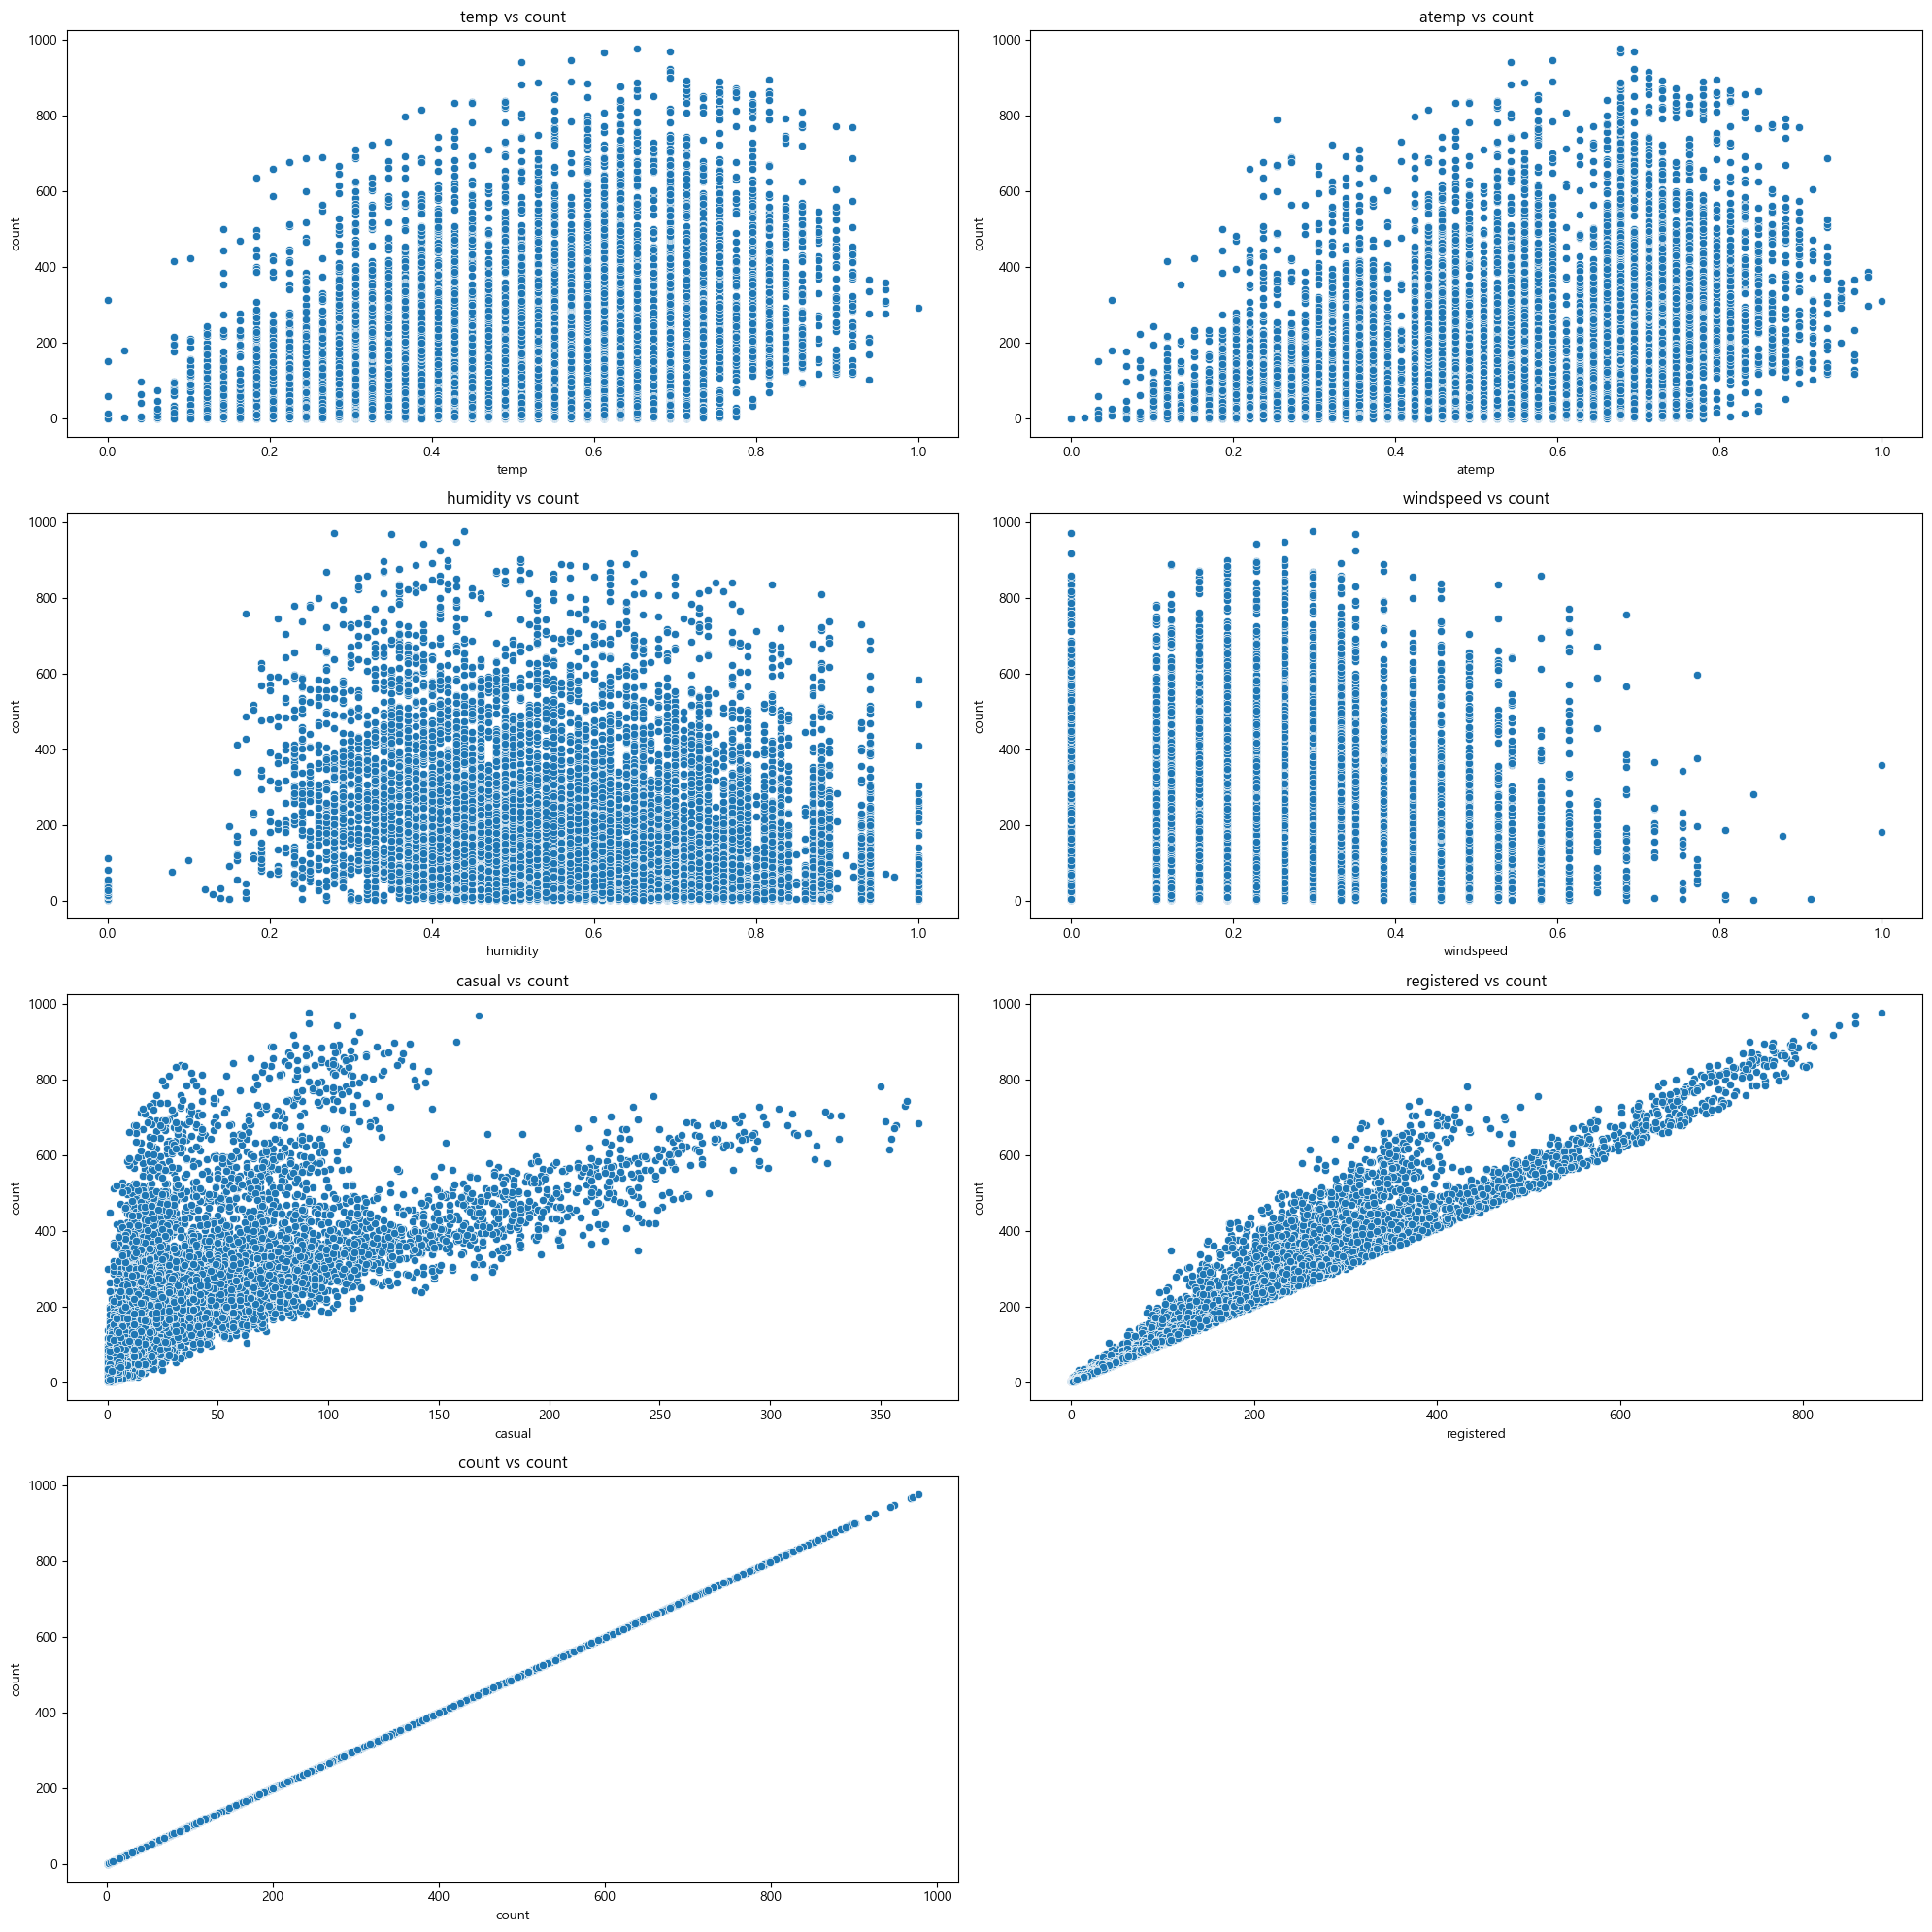

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# 피어슨 상관계수 계산
correlations = {}
for col in continuous_cols:
    corr, p_val = pearsonr(data_nor[col], data_nor['count'])
    correlations[col] = {'correlation': corr, 'p_value': p_val}

# 결과 출력
correlation_df = pd.DataFrame(correlations).T
print(correlation_df)

# 변수별 선형 관계 시각화 (산점도)
fig, axs = plt.subplots(4, 2, figsize = (20, 20))  # 4행 2열

for i, col in enumerate(continuous_cols):
    ax = axs[i//2, i%2]  # 행은 2로 나누고, 열은 2로 나눈 나머지로 설정
    sns.scatterplot(x=col, y='count', data=data_nor, ax=ax)  # ax 지정
    ax.set_title(f'{col} vs count')  # 각 서브플롯에 제목 추가
    ax.set_xlabel(col)  # x축 레이블
    ax.set_ylabel('count')  # y축 레이블

# 비어 있는 마지막 서브플롯을 숨기기
if len(continuous_cols) < 8:
    axs[-1, -1].axis('off')  # 마지막 서브플롯 숨기기


plt.tight_layout()  # 서브플롯 간 간격을 자동으로 조정
plt.show()





In [163]:
# 모델 분석
# 사용할 피쳐만 선택

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score


X = data_nor[['temp', 'humidity', 'windspeed']]
y = data_nor['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,temp,humidity,windspeed
3133,0.816327,0.59,0.000000
5786,0.081633,0.54,0.105325
5224,0.224490,0.48,0.228047
8953,0.714286,0.62,0.228047
8054,0.612245,0.53,0.298225
...,...,...,...
1963,0.571429,0.49,0.333373
5807,0.306122,0.66,0.386035
10061,0.387755,0.40,0.228047
5427,0.265306,0.81,0.122840


In [164]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# 모델 학습
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# 예측
y_pred = lr_model.predict(X_test)
print(f'기울기 : {lr_model.coef_} \n예측값 : {y_pred}')

result2 = pd.DataFrame({
    '온도' : X_test['temp'],
    '상대습도' : X_test['humidity'],
    '풍속' : X_test['windspeed'],
    '실제 대여수' : y_test,
    '예측 대여수' : y_pred
})
result2


기울기 : [ 345.72150649 -270.04702188   18.21657829] 
예측값 : [309.96277103  71.38430956 139.21150088 ... 217.25959023  62.29054534
 212.81056439]


,온도,상대습도,풍속,실제 시험 점수,예측 시험 점수
3133,0.816327,0.59,0.000000,127,309.962771
5786,0.081633,0.54,0.105325,13,71.384310
5224,0.224490,0.48,0.228047,163,139.211501
8953,0.714286,0.62,0.228047,233,270.737901
8054,0.612245,0.53,0.298225,222,261.042822
...,...,...,...,...,...
1963,0.571429,0.49,0.333373,351,258.373888
5807,0.306122,0.66,0.386035,2,121.703193
10061,0.387755,0.40,0.228047,509,217.259590
5427,0.265306,0.81,0.122840,5,62.290545


In [166]:
df_compare = pd.DataFrame({
    '실제 값' : y_test,
    '예측 값' : y_pred
})
df_compare

,실제 값,예측 값
3133,127,309.962771
5786,13,71.384310
5224,163,139.211501
8953,233,270.737901
8054,222,261.042822
...,...,...
1963,351,258.373888
5807,2,121.703193
10061,509,217.259590
5427,5,62.290545


결정계수(r2) : 0.2567812172497609
평균제곱근오차(RMSE) : 156.62494914900267


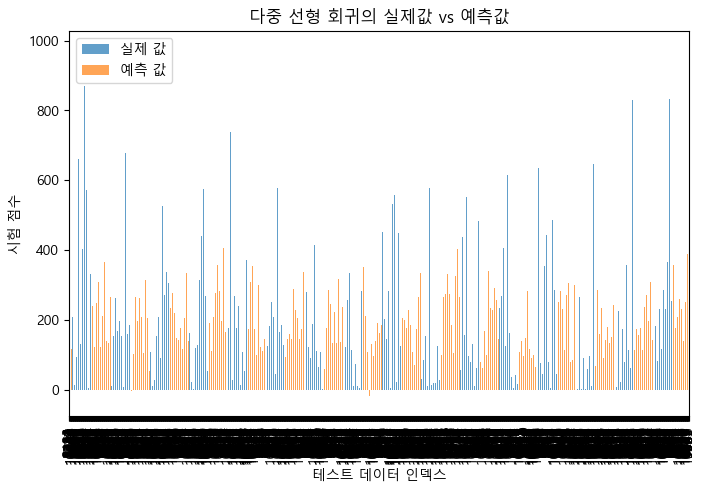

In [167]:
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

# 결정 계수
r2 = r2_score(y_test, y_pred)
print(f'결정계수(r2) : {r2}')

# 평균제곱근오차(RMSE)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'평균제곱근오차(RMSE) : {rmse}')

df_compare.plot(kind = 'bar', figsize = (8,5), alpha = 0.7)
plt.xlabel('테스트 데이터 인덱스')
plt.ylabel('시험 점수')
plt.title('다중 선형 회귀의 실제값 vs 예측값')
plt.legend()
plt.show()




   실제 값        예측 값
0    16   45.941739
1    13   62.144560
2     8   62.144560
3    36  114.265515
4   106  153.929828
10886


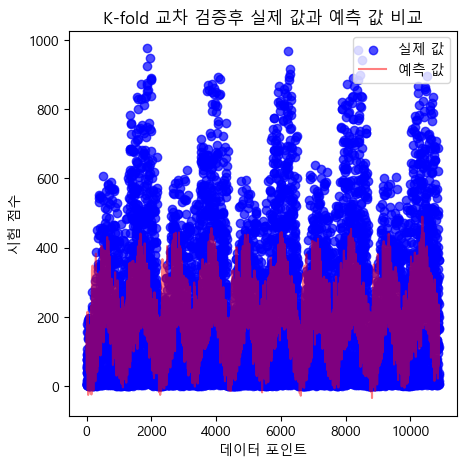

In [168]:
from sklearn.model_selection import KFold


# KFold 설정 (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# 선형 회귀 모델
lr_model = LinearRegression()

# 성능 평가를 위한 리스트
y_test_all = []
y_pred_all = []

# KFold 교차 검증 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model.fit(X_train, y_train)
    # 예측
    y_pred = lr_model.predict(X_test)
 # print(y_pred)
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)

result_df = pd.DataFrame({
    '실제 값' : y_test_all,
    '예측 값' : y_pred_all,
})

print(result_df.head())
print(len(result_df))


plt.figure(figsize=(5,5))
# 실제 데이터의 값을 보여주는 산점도
plt.scatter(range(len(result_df)), result_df['실제 값'], color='blue', label='실제 값', alpha=.7)
# 예측된 선 그래프, 회귀직선
plt.plot(result_df['예측 값'].values, color='red', label='예측 값', alpha=.5)
plt.xlabel('데이터 포인트')
plt.ylabel('시험 점수')
plt.title('K-fold 교차 검증후 실제 값과 예측 값 비교')
plt.legend()
plt.show()

In [169]:
r2 = r2_score(y_test_all, y_pred_all)
print(f'결정 계수 : {r2}') # 1에 가까울수록 좋은 계수
rmse = root_mean_squared_error(y_test_all, y_pred_all)
print(f'RMSE : {rmse}')

결정 계수 : 0.24069059217695943
RMSE : 157.8390592274407
